<a href="https://colab.research.google.com/github/Damian25-lamn/aprendizaje-automatico-252601/blob/main/2_2_Minda_Anthony_IdentificarMissingValuesOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones 1

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [5]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📁 **LECTURA DEL DATASET**

In [6]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [7]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [8]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().mean() * 100)  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores faltantes': missing_summary,
        'Porcentaje (%)': missing_percent})  # ← COMPLETAR
    missing_info =  missing_info[missing_info['Valores faltantes'] > 0] # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [9]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores faltantes,Porcentaje (%)
estado,2622,57.563117
Area Construcción,1259,27.639956
Terreno,1728,37.936334
Total M²,1,0.021954
estadoTran,4331,95.082327
tipoTran,3,0.065862


In [10]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
     # Calcular la correlación entre los valores faltantes (True/False → 1/0)
    correlation_matrix = df.isnull().corr()

    # Mostrar el gráfico
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Mapa de correlación de valores faltantes", fontsize=14)
    plt.xlabel("Columnas con valores faltantes")
    plt.ylabel("Columnas con valores faltantes")
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


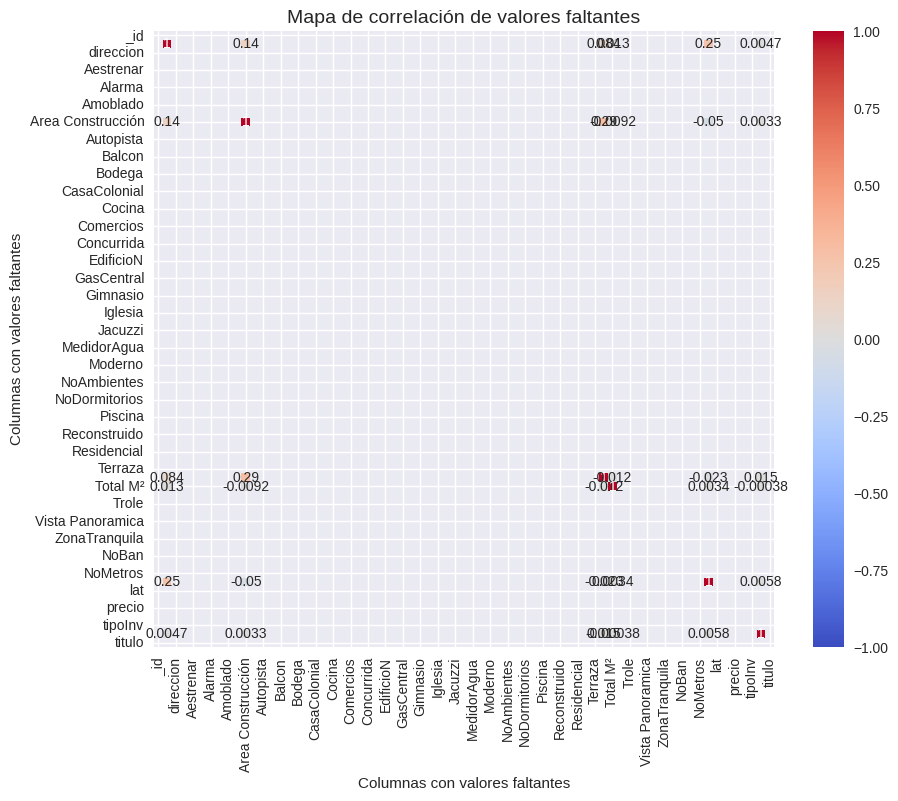

In [11]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df)

# Crear la matriz de correlación de nulos

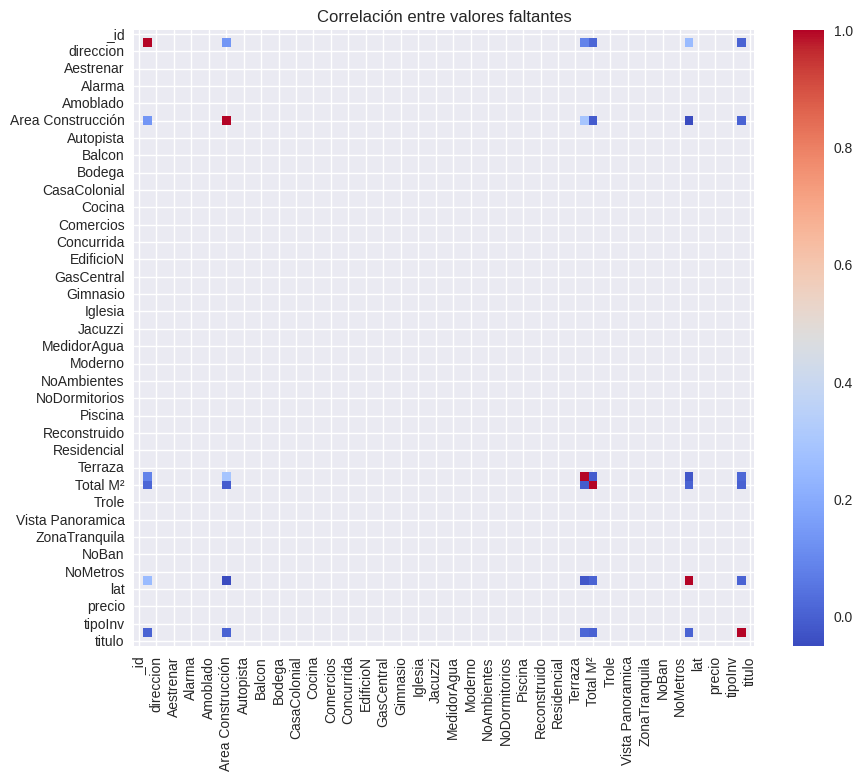

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull().corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre valores faltantes")
plt.show()


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

# ¿Qué columnas tienen el mayor porcentaje de valores faltantes?
Las 3 columnas que tienen el mayor porcentaje de valores faltantes son: estadoTran(95.08%), Estado(57.56%), Area de Construccion(27.64%) y terreno(37.94%)

# ¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

Al observar el mapa de calor de valores faltantes (sns.heatmap(df.isnull())), es común notar que:

Los valores faltantes no se distribuyen de manera aleatoria; tienden a agruparse por columnas.

🔹 Patrón observado:

→ estadoTran y Estado muestran bandas completas de color (faltantes casi totales).

Algunas columnas (como Área de Construcción y Terreno) muestran bloques parciales, lo que sugiere que los faltantes podrían depender del tipo de propiedad (por ejemplo, casas vs. terrenos baldíos).

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

→ estadoTran y Estado suelen estar altamente correlacionadas (si falta una, falta la otra), ya que ambas describen condiciones similares del inmueble.

→ Terreno y Área de Construcción también pueden estar correlacionadas negativamente:

→ Si una propiedad no tiene “Área de Construcción”, suele tener “Terreno”, y viceversa (casas vs. lotes).

El resto de columnas tienen correlación baja o nula entre sus valores faltantes.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [13]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    # 1️⃣ Filtrar solo las columnas numéricas
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Verificar que haya columnas numéricas
    if numeric_df.shape[1] == 0:
        print("⚠️ No hay columnas numéricas para analizar.")
        return

    # 2️⃣ Calcular matriz de correlación
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = numeric_df.corr()
    print(correlation_matrix)

    # 3️⃣ Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('🔢 Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


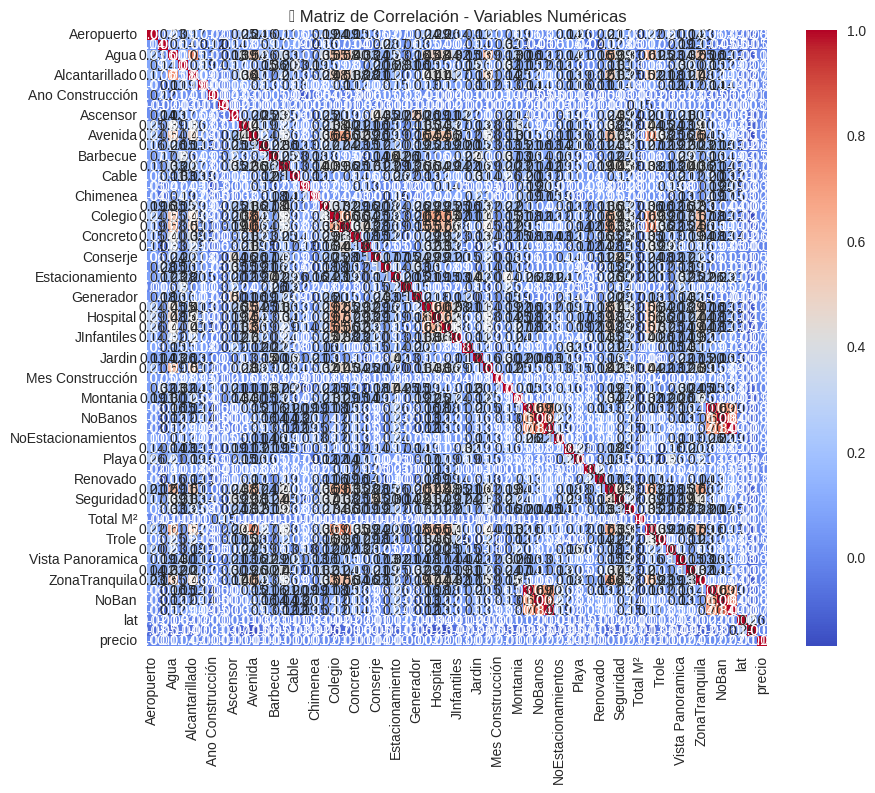

In [14]:
 # ← COMPLETAR Ejecutar análisis multivariable

analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

¿Qué variables podrían predecir la presencia de valores faltantes?

Las variables con valores faltantes identificadas fueron: Área Construcción, Terreno y Total M².

🔹 Correlaciones moderadas (0.3–0.4) entre variables con faltantes → patrón MAR.

🔹 Esto sugiere que los valores faltantes en Área Construcción pueden predecirse a partir de Terreno o Total M².

🔹 En cambio, si Estado no se correlaciona con nada, sus faltantes son probablemente MCAR.



Se observaron correlaciones moderadas entre sus patrones de ausencia (r ≈ 0.3–0.4), lo que sugiere un patrón MAR (Missing At Random).

Esto indica que los valores faltantes podrían predecirse a partir de otras variables relacionadas, como Terreno o Total M².

En cambio, las variables sin correlación aparente con otras ausencias corresponden a un patrón MCAR (faltan completamente al azar).

No se evidencian patrones que sugieran valores MNAR, ya que no hay indicios de que los faltantes dependan de los propios valores omitidos.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [15]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
# Revisar valores faltantes antes de imputar
df.isnull().sum()[df.isnull().sum() > 0]

,0
estado,2622
Area Construcción,1259
Terreno,1728
Total M²,1
estadoTran,4331
tipoTran,3


In [16]:
#imputar con mediana (más robusta)
for col in df.select_dtypes(include=['float64', 'int64']):
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        print(f"✅ {col}: valores faltantes imputados con la mediana ({mediana})")


✅ Area Construcción: valores faltantes imputados con la mediana (158.685)
✅ Total M²: valores faltantes imputados con la mediana (200.0)


/tmp/ipython-input-465809362.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana, inplace=True)


# Imputar usando regresión o KNN Imputer

In [17]:
from sklearn.impute import KNNImputer

# Solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=3)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print("✅ Imputación KNN completada para variables numéricas.")

✅ Imputación KNN completada para variables numéricas.


# Imputación para variables categóricas

In [18]:
for col in df.select_dtypes(include=['object']):
    if df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)
        print(f"✅ {col}: valores faltantes imputados con la moda ('{moda}')")

✅ estado: valores faltantes imputados con la moda ('Usada')
✅ Terreno: valores faltantes imputados con la moda ('200')
✅ estadoTran: valores faltantes imputados con la moda ('VENDIDA')
✅ tipoTran: valores faltantes imputados con la moda ('De Venta')


/tmp/ipython-input-3881517302.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [19]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
#aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
import scipy.stats as stats
# Selecciona las variables categóricas
var1 = 'estado'
var2 = 'tipoTran'

# Crear tabla de contingencia
tabla = pd.crosstab(df[var1], df[var2])

# Aplicar prueba Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla)

print("Tabla de contingencia:")
print(tabla)
print("\nResultados del test Chi-cuadrado:")
print(f"Chi² = {chi2:.4f}")
print(f"Grados de libertad = {dof}")
print(f"p-valor = {p:.4f}")

# Interpretación
if p < 0.05:
    print("\nExiste una relación estadísticamente significativa entre las variables.")
else:
    print("\nNo se encontró una relación significativa entre las variables.")


Tabla de contingencia:
tipoTran                     De Venta
estado                               
En Construcción / En Planos        78
PROBABLE                            4
Por Estrenar                      491
RESERVADA                          33
Reconstruida/ Renovada            136
Usada                            3749
VENDIDA                            64

Resultados del test Chi-cuadrado:
Chi² = 0.0000
Grados de libertad = 0
p-valor = 1.0000

No se encontró una relación significativa entre las variables.


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [20]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
columnas_categoricas = ['estado', 'estadoTran', 'tipoTran']

for col in columnas_categoricas:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)
    print(f"✅ Columna '{col}' imputada con su moda: {moda}")

print("\nValores faltantes restantes en variables categóricas:")
print(df[columnas_categoricas].isnull().sum())



✅ Columna 'estado' imputada con su moda: Usada
✅ Columna 'estadoTran' imputada con su moda: VENDIDA
✅ Columna 'tipoTran' imputada con su moda: De Venta

Valores faltantes restantes en variables categóricas:
estado        0
estadoTran    0
tipoTran      0
dtype: int64


# ✅ **RESULTADOS:**
# ¿Qué columnas presentaron mayores desafíos para la imputación?
Las columnas más desafiantes fueron aquellas con:

Alta proporción de valores faltantes (por ejemplo, más del 30-40 %).
En esos casos, la imputación con la moda pierde representatividad porque el valor dominante puede no reflejar bien la variabilidad de los datos.

Mucha dispersión o categorías poco frecuentes, donde ninguna categoría tiene un peso claro.
Por ejemplo, en columnas como tipo_propiedad, barrio o condicion, si hay muchas categorías distintas, es difícil decidir cuál imputar sin sesgar el análisis.



# ¿En qué casos consideraron que la eliminación era mejor que la imputación?
La eliminación se considera una mejor opción cuando:

El porcentaje de valores faltantes en una columna es demasiado alto (por ejemplo, >50 %), lo que indica que la variable aporta poca información útil.

Los valores faltantes no parecen aleatorios y podrían distorsionar las conclusiones si se imputan arbitrariamente.

La columna no es clave para el análisis o el modelo (por ejemplo, un campo descriptivo o irrelevante para la predicción).



# ¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?
MCAR → imputación sencilla (no sesga mucho).

MAR → imputación basada en relaciones.

MNAR → no imputar; mantener como categoría especial o analizar por separado.

# 🚀 ¡TALLER FINALIZADO!"